# ASSIGNMENT - 3

### Problem Statement
Recurrent neural network (RNN) - Use the Google stock prices dataset and design a time
series analysis and prediction system using RNN.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("GOOGL (2).csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [ ]:
train = data.iloc[:1260,:]
test = data.iloc[1260:1384,:]

In [ ]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
1255,2009-08-13,231.306305,232.592590,229.684692,231.371368,231.371368,3986410
1256,2009-08-14,231.621628,231.821823,228.673676,230.230225,230.230225,3346850
1257,2009-08-17,225.975983,226.221222,221.781784,222.667664,222.667664,5235160
1258,2009-08-18,222.772766,224.074081,221.381378,222.862869,222.862869,4697498


In [ ]:
trainset = train.iloc[:,1:2].values

In [ ]:
trainset

array([[ 50.050049],
       [ 50.555557],
       [ 55.430431],
       ...,
       [225.975983],
       [222.772766],
       [220.21521 ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [ ]:
training_scaled

array([[0.00126179],
       [0.00283516],
       [0.01800791],
       ...,
       [0.54882077],
       [0.53885095],
       [0.53089071]])

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60,1125):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1065, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam',loss = 'mse', metrics = ['mae'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
34/34 [==============================] - 13s 143ms/step - loss: 0.0419 - mae: 0.1424
Epoch 2/100
34/34 [==============================] - 4s 107ms/step - loss: 0.0073 - mae: 0.0636
Epoch 3/100
34/34 [==============================] - 4s 108ms/step - loss: 0.0065 - mae: 0.0612
Epoch 4/100
34/34 [==============================] - 8s 240ms/step - loss: 0.0058 - mae: 0.0586
Epoch 5/100
34/34 [==============================] - 4s 119ms/step - loss: 0.0059 - mae: 0.0574
Epoch 6/100
34/34 [==============================] - 4s 115ms/step - loss: 0.0049 - mae: 0.0523
Epoch 7/100
34/34 [==============================] - 5s 133ms/step - loss: 0.0051 - mae: 0.0546
Epoch 8/100
34/34 [==============================] - 4s 108ms/step - loss: 0.0046 - mae: 0.0512
Epoch 9/100
34/34 [==============================] - 4s 108ms/step - loss: 0.0045 - mae: 0.0503
Epoch 10/100
34/34 [==============================] - 5s 143ms/step - loss: 0.0064 - mae: 0.0609
Epoch 11/100
34/34 [==================

In [ ]:
test

In [ ]:
real_stock_price = test.iloc[:,1:2].values

In [ ]:
dataset_total = pd.concat((train['Open'],test['Open']),axis = 0)
dataset_total

In [ ]:
inputs = dataset_total[len(dataset_total) - len(test)-60:].values
inputs

array([203.023026, 204.54454 , 206.261261, 209.57457 , 213.338333,
       213.213211, 217.867874, 222.757751, 219.969971, 219.509506,
       218.333328, 216.101105, 213.643646, 210.960968, 209.864868,
       208.303299, 208.04805 , 209.314316, 208.683685, 203.528534,
       204.57457 , 203.703705, 207.047043, 213.213211, 212.212219,
       212.312317, 207.912918, 203.453445, 204.324326, 200.200195,
       203.26326 , 204.994995, 208.293289, 212.067062, 215.045044,
       218.558563, 216.716721, 215.155151, 215.685684, 214.214218,
       214.55455 , 218.123123, 223.24324 , 220.720718, 218.833832,
       221.52652 , 225.21521 , 224.594589, 224.909912, 228.228226,
       227.37738 , 228.063065, 227.797791, 227.062057, 227.932938,
       231.306305, 231.621628, 225.975983, 222.772766, 220.21521 ,
       226.226227, 233.003006, 233.908905, 234.799805, 236.616623,
       234.524521, 234.864868, 230.125122, 230.070068, 228.138138,
       228.138138, 229.014008, 232.37738 , 229.759766, 233.558

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs

array([[203.023026],
       [204.54454 ],
       [206.261261],
       [209.57457 ],
       [213.338333],
       [213.213211],
       [217.867874],
       [222.757751],
       [219.969971],
       [219.509506],
       [218.333328],
       [216.101105],
       [213.643646],
       [210.960968],
       [209.864868],
       [208.303299],
       [208.04805 ],
       [209.314316],
       [208.683685],
       [203.528534],
       [204.57457 ],
       [203.703705],
       [207.047043],
       [213.213211],
       [212.212219],
       [212.312317],
       [207.912918],
       [203.453445],
       [204.324326],
       [200.200195],
       [203.26326 ],
       [204.994995],
       [208.293289],
       [212.067062],
       [215.045044],
       [218.558563],
       [216.716721],
       [215.155151],
       [215.685684],
       [214.214218],
       [214.55455 ],
       [218.123123],
       [223.24324 ],
       [220.720718],
       [218.833832],
       [221.52652 ],
       [225.21521 ],
       [224.5

In [ ]:
inputs = sc.transform(inputs)
inputs.shape

(184, 1)

In [ ]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [ ]:
predicted_price = model.predict(x_test)

4/4 [==============================] - 2s 31ms/step


In [ ]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[225.75772],
       [224.11057],
       [224.68706],
       [227.15135],
       [230.3153 ],
       [233.2937 ],
       [235.11038],
       [235.71811],
       [234.79153],
       [232.99059],
       [230.87717],
       [229.06137],
       [228.02066],
       [228.2636 ],
       [229.0095 ],
       [230.24919],
       [231.91985],
       [233.56743],
       [235.14099],
       [236.7836 ],
       [239.10754],
       [242.14471],
       [244.30835],
       [246.19885],
       [247.84477],
       [249.02776],
       [249.15543],
       [248.54297],
       [248.12529],
       [248.21712],
       [248.08084],
       [246.85538],
       [245.30904],
       [244.43336],
       [244.98007],
       [248.21693],
       [252.59499],
       [256.904  ],
       [260.15494],
       [262.67816],
       [264.54507],
       [266.94025],
       [270.0117 ],
       [272.77512],
       [274.39954],
       [274.91507],
       [275.27142],
       [275.78882],
       [275.9166 ],
       [275.37833],


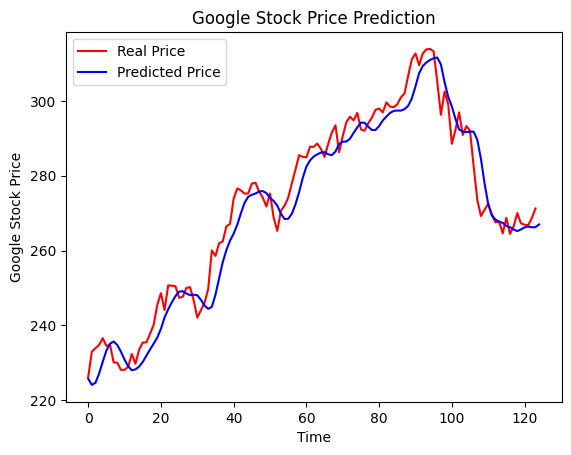

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()